# Taller 3, Métodos Numéricos

El objetivo del taller es ejercitar los temas de interpolación e integración numérica. Por tal motivo, se deben resolver los siguientes ejercicios y responder las preguntas justificando adecuadamente.

## Evaluación y entrega
- La evaluación será mediante un coloquio con los docentes durante la clase.
- El taller se realiza en grupos hasta 2 ó 3 personas.

## Ejercicio 1

Una tabla de una variable se dice bien *condicionada* para la interpolación lineal si el error debido a la interpolación no excede al error de redondeo de la tabla. 
Se desea construir una tabla de seis cifras (error menor a $10^{-6}$) para la función $log(x)$ en el intervalo $(1,10)$, de tal manera que la tabla esté bien condicionada para interpolación lineal. 


* Determinar el tamaño del paso $h$ más grande posible y la cantidad de valores de la misma.

 **HINT:** Tener en cuenta que para cualquier x en el intervalo $(1,10)$, deberá existir un $j$  tal que  $x_{j} \leq x \leq x_{j+1}$ con $x_{j}= 1 + hj$ de manera tal que el polinomio interpolador lineal de Lagrange 
 
    $$ P(x) = L_{0}(x)f(x_{0}) + L_{1}(x)f(x_{1})$$ en ese intervalo cumpla que 
    
    $$ |log(x) - P(x)| \leq 10^{-6}$$   

In [14]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from scipy.integrate import quad

**SOLUCIÓN:**


* Comparar y verifcar el error en puntos intermedios. Considerar usar la función [np.log(x)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)


In [15]:
def interpolacion_lineal(x, h, xs):
    y = []
    for xi in x:
      if xi <= xs[0]:
        y.append(((np.log(xs[1]) - np.log(xs[0])) / (xs[1] - xs[0])) * (xi - xs[0]) + np.log(xs[0]))
      elif xi >= xs[-1]:
        y.append(((np.log(xs[-1]) - np.log(xs[-2])) / (xs[-1] - xs[-2])) * (xi - xs[-1]) + np.log(xs[-1]))
      else:
        i = 0
        while not (xs[i] <= xi < xs[i + 1]):
          i += 1
        y.append(((np.log(xs[i + 1]) - np.log(xs[i])) / (xs[i + 1] - xs[i])) * (xi - xs[i]) + np.log(xs[i]))
      
    return np.asarray(y)

# Verifiquemos la interpolación en puntos iniciales
h = 1e-3
xs = np.arange(1, 10, h)
ys = interpolacion_lineal(xs, h, xs)

assert np.all(np.abs(ys - np.log(xs)) < 10**-12)

# Ahora consideremos puntos intermedios a los originales
xnew = np.linspace(1, 10, 1000)
ynew = interpolacion_lineal(xnew, h, xs)

assert np.all(np.abs(ynew - np.log(xnew)) < 1e-6)

print("Ok")

Ok


## Ejercicio 2

* Dados los puntos $(-1,3), (1,1), (2,3), (3,7)$, determinar cuántos polinomios de grado $d$ existen que pasen por *todos* los puntos, para d $\in \{2, 3, 4\} $.

**SOLUCIÓN:**


     x f(x)   
   
    -1  3
                                         
               -1         
                                   
     1  1                    1
                                            
               2                  0
                                    
     2  3                    1
                                        
               4
                                                                         
     3  7      


     f(x) = 3 - (x+1) + (x+1)(x-1)
     f(x) = x^2 - x + 1
     

* Para cada valor de $d$, en caso de ser posible, mostrar uno. 

**HINT:** Utilizar el método de diferencias divididas y graficar los polinomios intermedios.


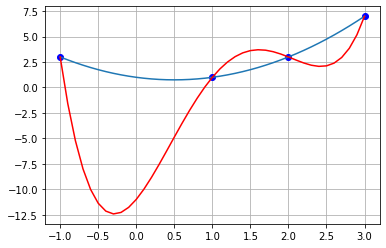

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def eval_poli(xnew, coef, x):
    def brackets(xs, ys):
      if len(ys) == 1:
          return ys[0]
      else:
          return (brackets(xs[1:], ys[1:]) - brackets(xs[:-1], ys[:-1])) / (xs[-1] - xs[0])

    y = []
    for xi in xnew:
      P = coef[0]
      for k in range(1, len(x) - 1):
          P = P + brackets(x[:k + 1], coef[:k + 1]) * np.prod(xi - x[:k])

      y.append(P)
    
    return y


x = np.array([-1, 1, 2, 3])
y = np.array([ 3, 1, 3, 7])

coef = y
xnew = np.linspace(np.min(x), np.max(x), num=41, endpoint=True)
ynew = eval_poli(xnew, coef, x)

def poli4(x):
  y = (x ** 2 - x + 1) + 2 * (x + 1) * (x - 1) * (x - 2) * (x - 3)
  return y

poliy = poli4(xnew)

plt.plot(x,y,'bo')
plt.plot(xnew, ynew)
plt.plot(xnew, poliy, "r-")
plt.grid()

## Ejercicio 3

Queremos aproximar la función coseno utilizando distintos tipos de splines y el polinomio de Lagrange para luego comparar el error obtenido.

Error Lagrange: 0.03171174757248928
Error spline lineal: 0.7930831940837283


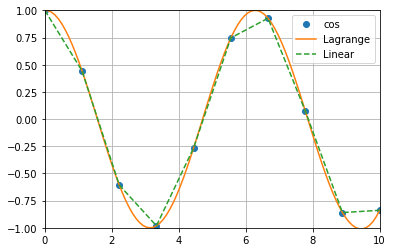

In [17]:
from scipy.interpolate import lagrange

x = np.linspace(0,10,num=10) 
y = np.cos(x)

# Obtengo los polinomios segun los nodos anteriores

lagr = lagrange(x, y) 
linear = interp1d(x, y, kind='linear') 

# Interpolamos en otros puntos

xs = np.linspace(0,10,100)
ys_lagr = lagr(xs)
ys_lin = linear(xs)

# Ploteamos

plt.plot(x, y, 'o', xs, ys_lagr, '-',  xs, ys_lin, '--')
plt.legend(['cos','Lagrange','Linear'], loc='best')
plt.grid(b=True,which='both')
plt.axis([0,10, -1, 1])

# Error

print("Error Lagrange: " + str(np.linalg.norm(np.cos(xs) - ys_lagr)))
print("Error spline lineal: " + str(np.linalg.norm(np.cos(xs) - ys_lin)))

* Dada la siguiente tabla de datos que representa la silueta de un **pato**, probar disintos tipos Splines junto con el polinomio de Lagrange y compararlos

| x    | 0.9 | 1.3 | 1.9  | 2.1 | 2.6 | 3.0 | 3.9 | 4.4  | 4.7  | 5.0 | 6.0  | 7.0 | 8.0  | 9.2  | 10.5 | 11.3 | 11.6 | 12.0 | 12.6 | 13.0 | 13.3 |
|------|-----|-----|------|-----|-----|-----|-----|------|------|-----|------|-----|------|------|------|------|------|------|------|------|------|
| f(x) | 1.3 | 1.5 | 1.85 | 2.1 | 2.6 | 2.7 | 2.4 | 2.15 | 2.05 | 2.1 | 2.25 | 2.3 | 2.25 | 1.95 | 1.4  | 0.9  | 0.7  | 0.6  | 0.5  | 0.4  | 0.25 |

(0.0, 14.0, -6.0, 4.0)

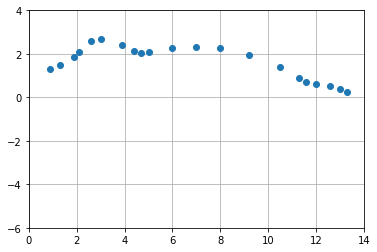

In [18]:
x = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0,
              7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 
              2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

plt.plot(x, y, 'o')
plt.grid(b=True,which='both')
plt.axis([0, 14, -6, 4])

(0.0, 14.0, -6.0, 4.0)

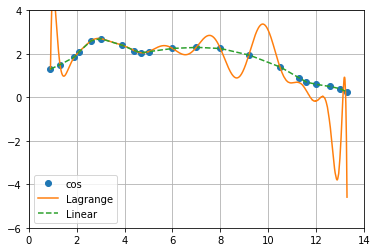

In [19]:
# Obtengo los polinomios segun los nodos anteriores

lagr = lagrange(x, y) 
linear = interp1d(x, y, kind='linear') 

# Interpolamos en otros puntos

xs = np.linspace(np.min(x), np.max(x), 1000)
ys_lagr = lagr(xs)
ys_lin = linear(xs)

# Ploteamos

plt.plot(x, y, 'o', xs, ys_lagr, '-',  xs, ys_lin, '--')
plt.legend(['cos','Lagrange','Linear'], loc='best')
plt.grid(b=True,which='both')
plt.axis([0, 14, -6, 4])

## Ejercicio 4

* Deducir la fórmula de Newton-Cotes para $\int_{0}^{1}f(x)dx$ usando como nodos a los puntos $0,1$




**SOLUCIÓN:**

$\int_0^1 f(x) dx = \frac{1}{2} (f(0) + f(1))$

* Utilizar el punto anterior para integrar $\int_{0}^{1}\exp (-x^{2})dx$

In [63]:
def gaussiana(x):
    return np.exp(-x ** 2)

# Pueden comparar contra esta función de scipy
true_integral = quad(gaussiana, 0, 1)[0]
integral = 0.5 * (gaussiana(0) + gaussiana(1))

print(true_integral - integral)

0.06288441222670593


## Ejercicio 5

* Indicar cuántos puntos se deben tomar en la aproximación de
$$
\int_{0}^{1}\exp (-x^{2})dx
$$
por medio de la regla de los Trapecios Compuesta para que el error sea menor que $10^{-6}$.

**HINT**: Graficar el modulo de la segunda derivada de $\exp (-x^{2})$

**SOLUCIÓN:**

En este caso tenemos $f(x) = \exp{(-x^2)}$. Entonces, $f''(x) = (4x^2 - 2)\exp{(-x^2)}$. Ya que el error está dado por $-\frac{1}{12 n^2}f''(\mu)$, con $\mu \in (0, 1)$ entonces $n \geqslant \sqrt{\frac{|f''(\mu)|}{12}} \times 10^{3}$. Resulta que el máximo valor que toma $|f''(\mu)|$ es 2 en $\mu = 0$, así que $n \geqslant 409$.



* Calcular la aproximacion de la integral y comparar con el Ejercicio anterior

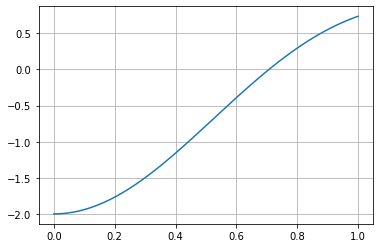

In [44]:
x = np.linspace(0, 1, 1000)
plt.plot(x, (4 * x ** 2 - 2) * np.exp(-x ** 2))
plt.grid()
plt.show()

In [117]:
def trapezoidal(a, b, n):
    intervals = np.linspace(a, b, n + 1, endpoint=True)
    h = (b - a) / n
    sum = 0
    for xi in intervals[1:n]:
        sum = sum + gaussiana(xi)

    return h * (np.sum(gaussiana(intervals[1:n])) + (gaussiana(a) + gaussiana(b)) / 2)

cool_integral = trapezoidal(0, 1, 408)
print(cool_integral)
print(np.abs(true_integral - cool_integral))

0.7468237644850262
3.68327400912527e-07
